In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv("rainfall.csv")

In [75]:
df.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [76]:
df.fillna(value = 0,inplace =True)

In [77]:

df.loc[21]


SUBDIVISION    ANDAMAN & NICOBAR ISLANDS
YEAR                                1923
JAN                                 79.5
FEB                                  0.0
MAR                                  0.0
APR                                 91.3
MAY                                293.5
JUN                                808.4
JUL                                636.9
AUG                                182.2
SEP                                560.5
OCT                                131.9
NOV                                197.4
DEC                                 70.6
ANNUAL                               0.0
Jan-Feb                             79.5
Mar-May                              0.0
Jun-Sep                           2188.0
Oct-Dec                            399.9
Name: 21, dtype: object

In [78]:
g = df.groupby(df.SUBDIVISION)
t = g.get_group("TAMIL NADU")



In [79]:
t.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8
3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2,821.1,14.0,165.7,264.1,377.2


array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>,
        <AxesSubplot:title={'center':'MAR'}>],
       [<AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>,
        <AxesSubplot:title={'center':'JUL'}>],
       [<AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'OCT'}>,
        <AxesSubplot:title={'center':'NOV'}>],
       [<AxesSubplot:title={'center':'DEC'}>,
        <AxesSubplot:title={'center':'ANNUAL'}>,
        <AxesSubplot:title={'center':'Jan-Feb'}>,
        <AxesSubplot:title={'center':'Mar-May'}>],
       [<AxesSubplot:title={'center':'Jun-Sep'}>,
        <AxesSubplot:title={'center':'Oct-Dec'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

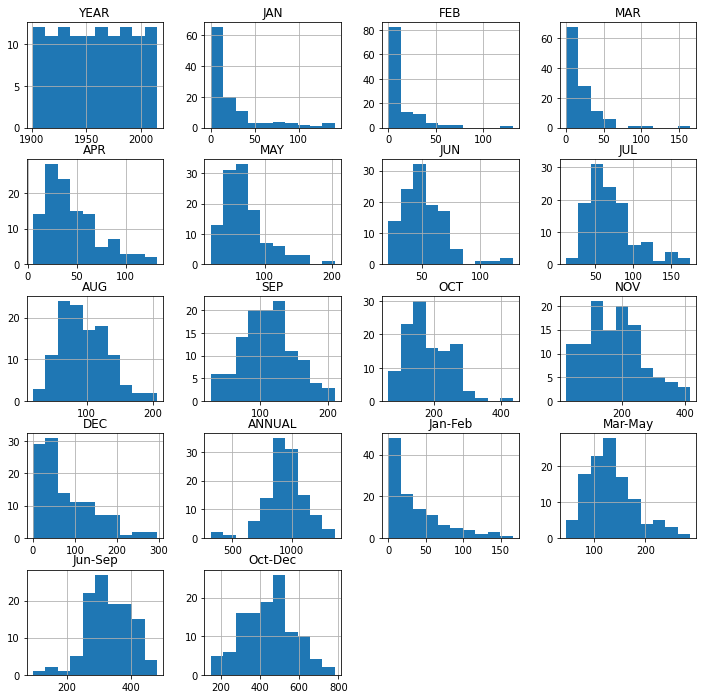

In [80]:
t.hist(figsize=(12,12))

In [81]:
d = np.asarray(t[['FEB', 'MAR', 'APR','MAY']])
print(np.shape(d))
X = d[:,0:3]
y = d[:,3]

(115, 4)


In [82]:
d = np.asarray(t[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
print(np.shape(d))

(115, 12)


In [83]:
X = None; y = None
for i in range(data.shape[1]-3):
    if X is None:
        X = d[:, i:i+3]
        y = d[:, i+3]
    else:
        X = np.concatenate((X, d[:, i:i+3]), axis=0)
        y = np.concatenate((y, d[:, i+3]), axis=0)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
np.shape(X_test)

(207, 3)

In [85]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)

45.267314100733856

In [86]:
xx = np.arange(start=0,stop=len(y_pred),step=1)

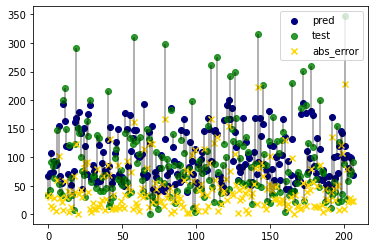

In [87]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

In [88]:
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_test)  
mean_absolute_error(y_test, Y_pred)

46.89449574289162

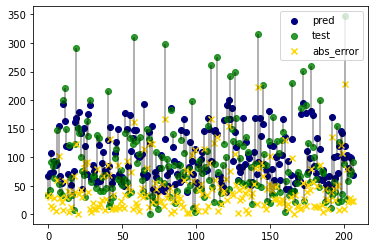

In [89]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

In [90]:
lrf = Lasso(alpha = 1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None)
lrf.fit(X_train, y_train)
y_pred = lrf.predict(X_test)
mean_absolute_error(y_test, y_pred)

c:\Users\VICTUS i5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


46.898926943059614

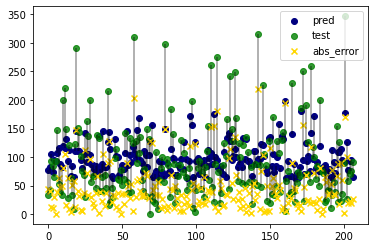

In [91]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

In [92]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X, y)
y_pred = rf.predict(X)
mean_absolute_error(y, y_pred)

26.984636450316412

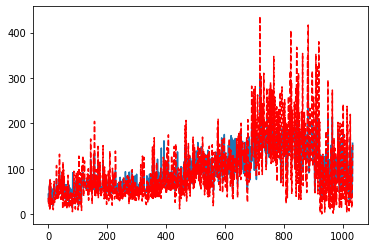

In [93]:
x_tot =np.arange(start=0,stop=len(y_pred),step=1)
plt.plot(x_tot,y_pred)
plt.plot(x_tot,y, "r--")
# Predicted outcomes on top of one another with an error bar representing how much they differ from one another using random forest regressor.